In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")

df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [6]:
#Number of rows and columns
df.shape

(38014, 18)

In [7]:
#Column names of the dataset
df.columns

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

In [8]:
#datatypes of the dataset
df.dtypes

DateTime                  object
Holiday                   object
HolidayFlag                int64
DayOfWeek                  int64
WeekOfYear                 int64
Day                        int64
Month                      int64
Year                       int64
PeriodOfDay                int64
ForecastWindProduction    object
SystemLoadEA              object
SMPEA                     object
ORKTemperature            object
ORKWindspeed              object
CO2Intensity              object
ActualWindProduction      object
SystemLoadEP2             object
SMPEP2                    object
dtype: object

In [9]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [10]:
#Missing values
df.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

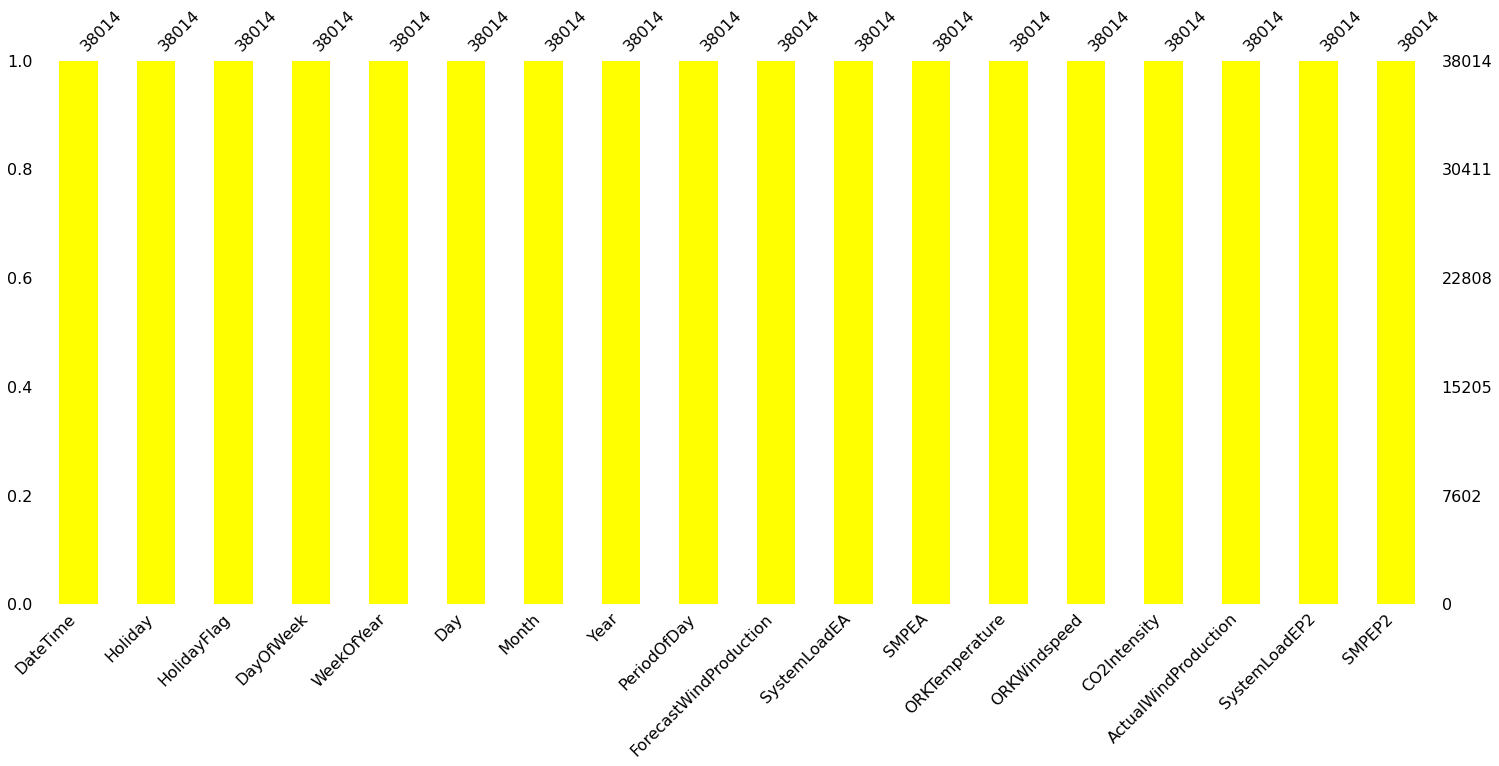

In [11]:
import missingno
missingno.bar(df,color='yellow')

In [12]:
#Convert object type into numeric type
df['ForecastWindProduction'] = pd.to_numeric(df['ForecastWindProduction'],errors='coerce')
df["SystemLoadEA"] = pd.to_numeric(df["SystemLoadEA"], errors= 'coerce')
df["SMPEA"] = pd.to_numeric(df["SMPEA"], errors= 'coerce')
df["ORKTemperature"] = pd.to_numeric(df["ORKTemperature"], errors= 'coerce')
df["ORKWindspeed"] = pd.to_numeric(df["ORKWindspeed"], errors= 'coerce')
df["CO2Intensity"] = pd.to_numeric(df["CO2Intensity"], errors= 'coerce')
df["ActualWindProduction"] = pd.to_numeric(df["ActualWindProduction"], errors= 'coerce')
df["SystemLoadEP2"] = pd.to_numeric(df["SystemLoadEP2"], errors= 'coerce')
df["SMPEP2"] = pd.to_numeric(df["SMPEP2"], errors= 'coerce')

In [13]:
df.dtypes

DateTime                   object
Holiday                    object
HolidayFlag                 int64
DayOfWeek                   int64
WeekOfYear                  int64
Day                         int64
Month                       int64
Year                        int64
PeriodOfDay                 int64
ForecastWindProduction    float64
SystemLoadEA              float64
SMPEA                     float64
ORKTemperature            float64
ORKWindspeed              float64
CO2Intensity              float64
ActualWindProduction      float64
SystemLoadEP2             float64
SMPEP2                    float64
dtype: object

In [14]:
df['Holiday'].value_counts()

None                    36478
Christmas Eve             144
Christmas                 144
St Stephen's Day          144
New Year's Eve            144
New Year's Day             96
St Patrick's Day           96
Good Friday                96
Holy Saturday              96
Easter                     96
Easter Monday              96
May Day                    96
June Bank Holiday          96
August Bank Holiday        96
October Bank Holiday       96
Name: Holiday, dtype: int64

In [15]:
#Remove 'DateTime' and 'Holiday'columns
df = df.drop(['DateTime','Holiday'],axis=1)

df.head()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87


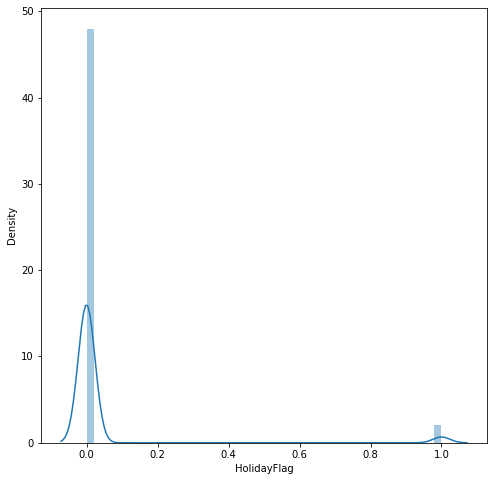

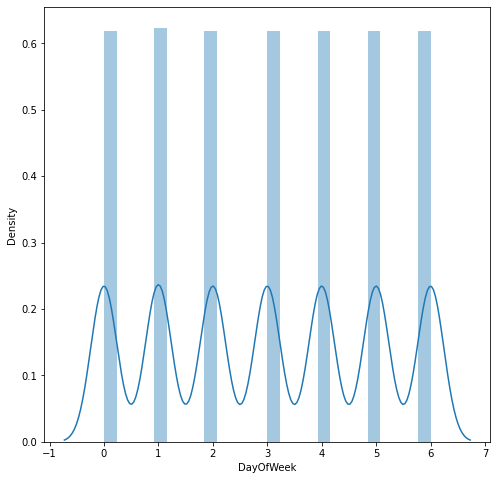

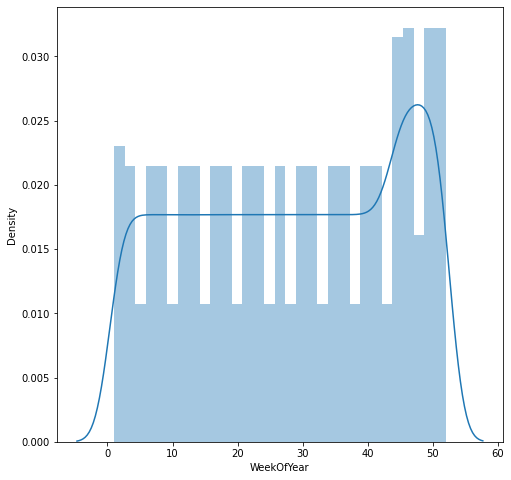

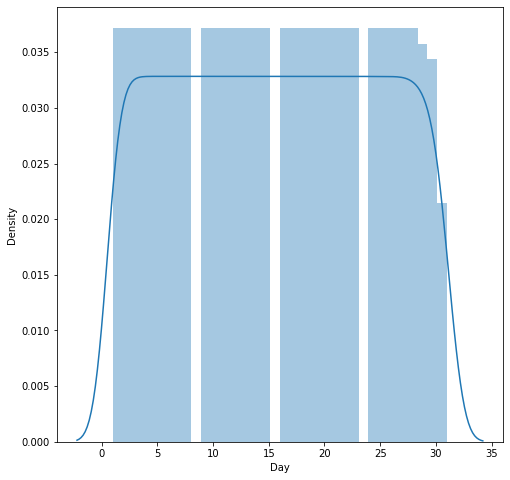

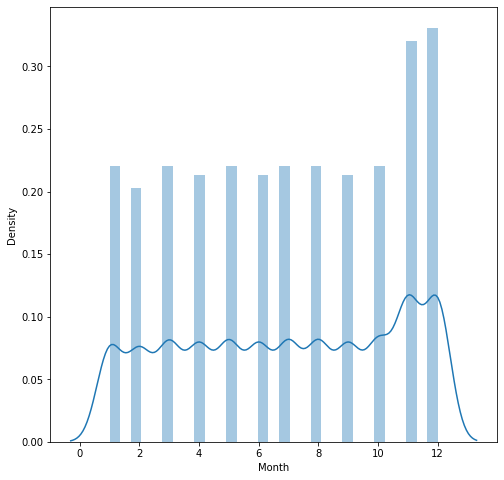

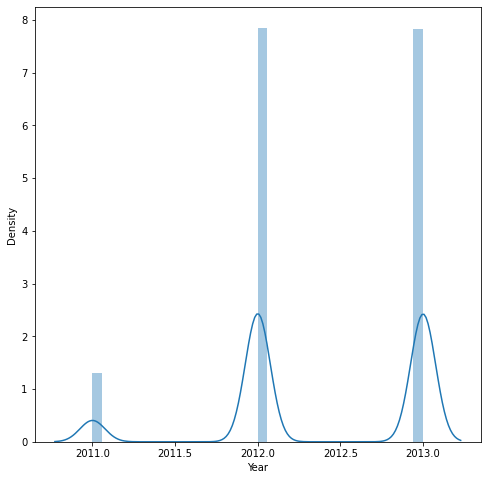

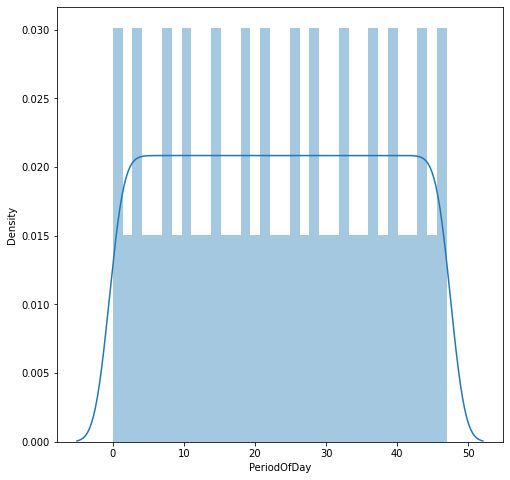

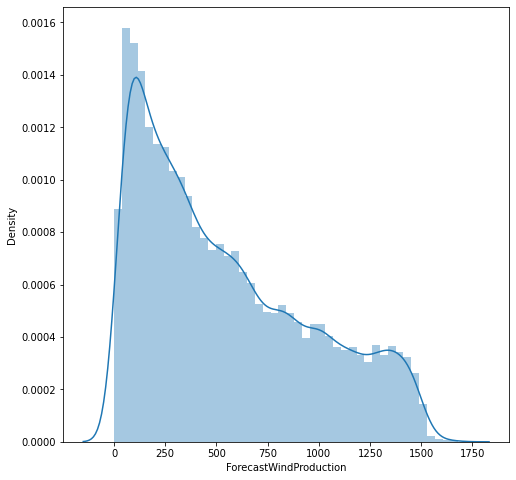

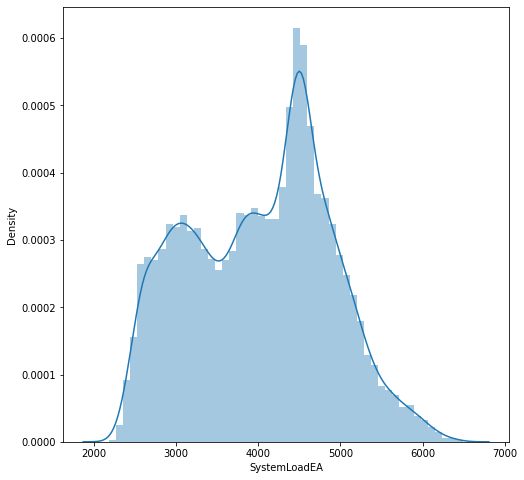

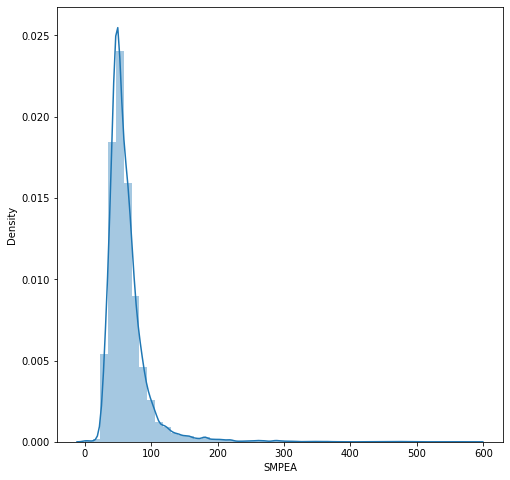

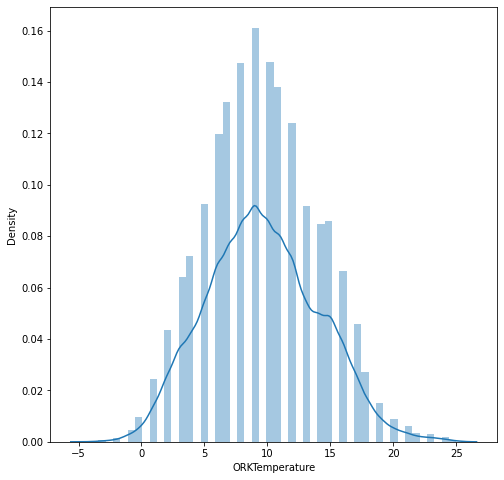

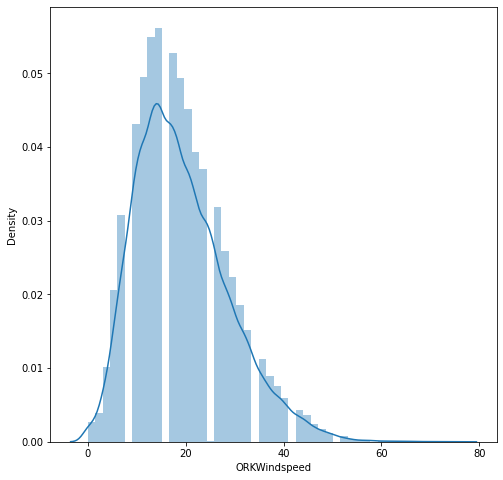

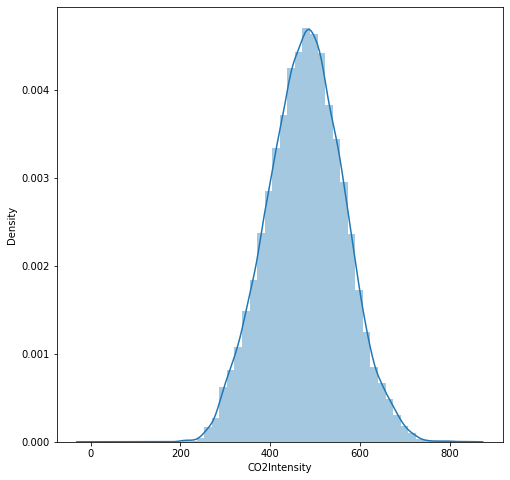

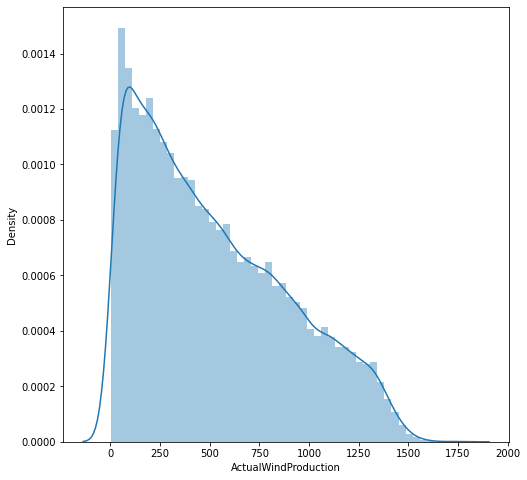

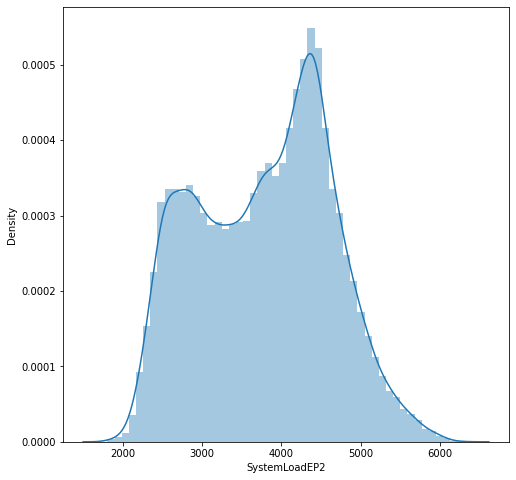

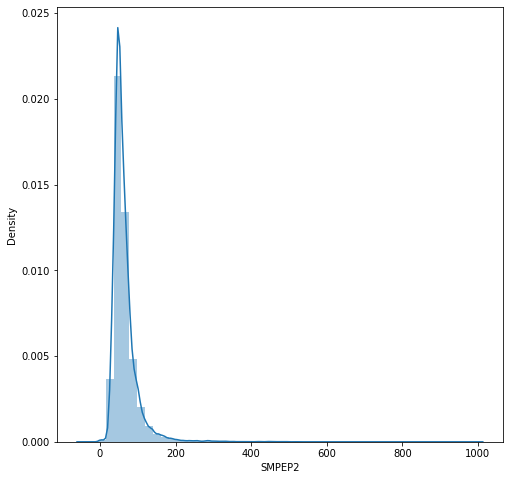

In [16]:
def visualization():
  for i in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8,8))
    value = sns.distplot(df[i])
visualization()

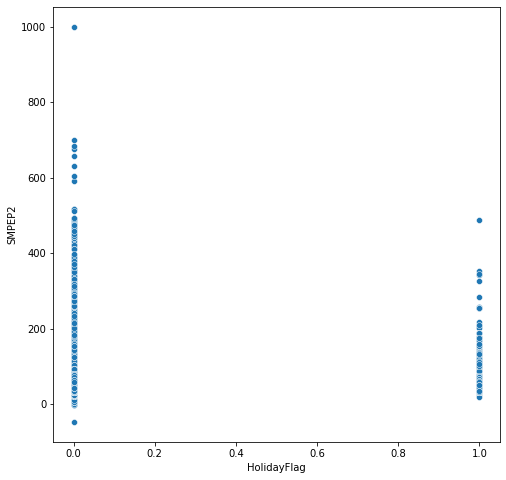

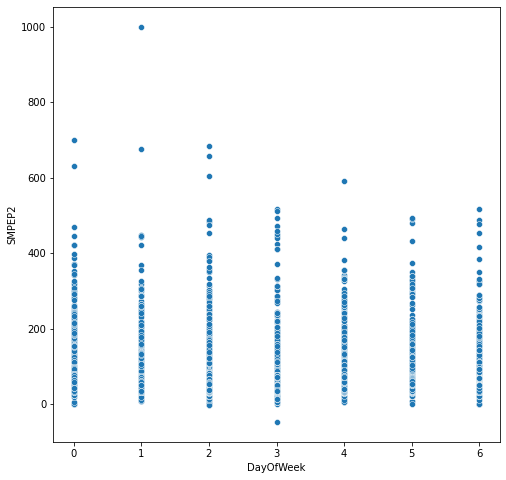

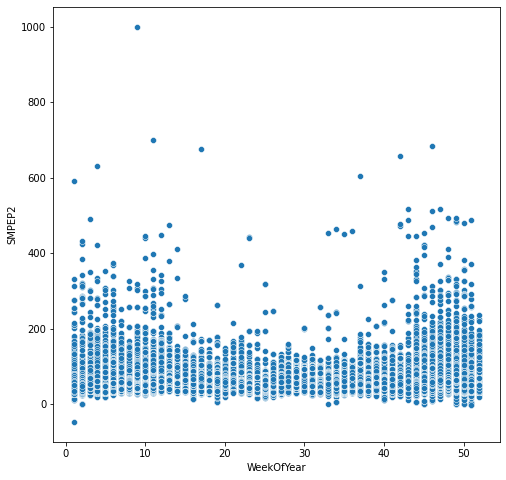

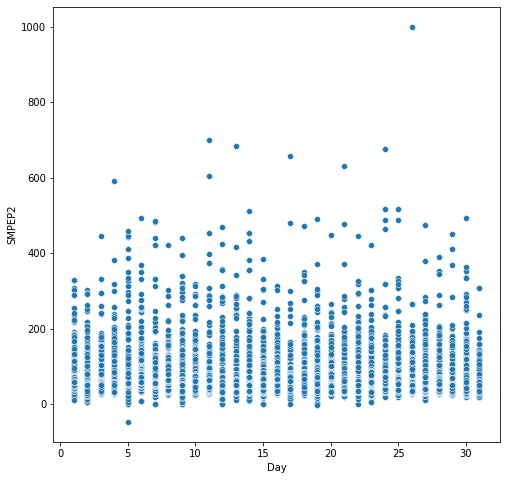

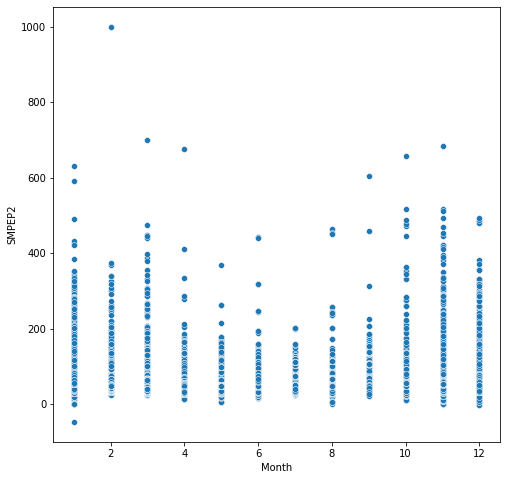

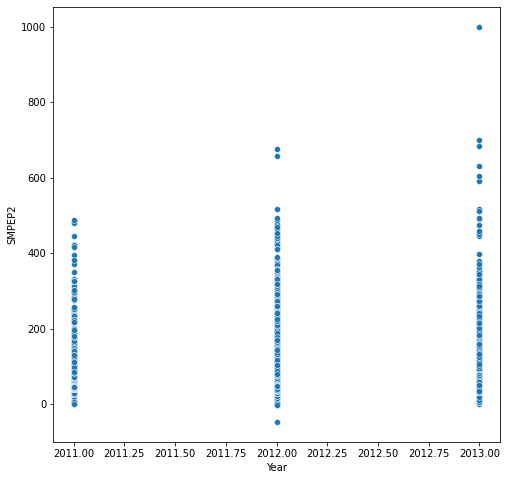

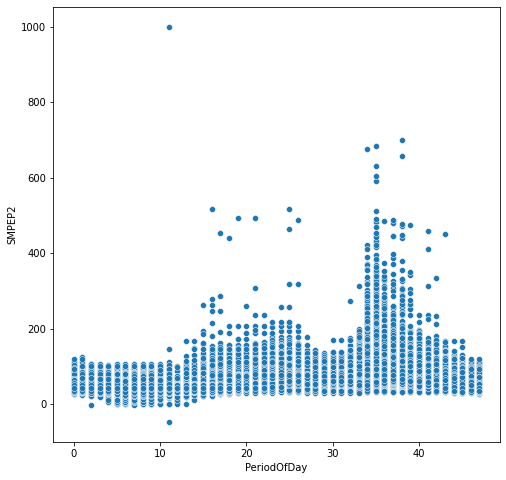

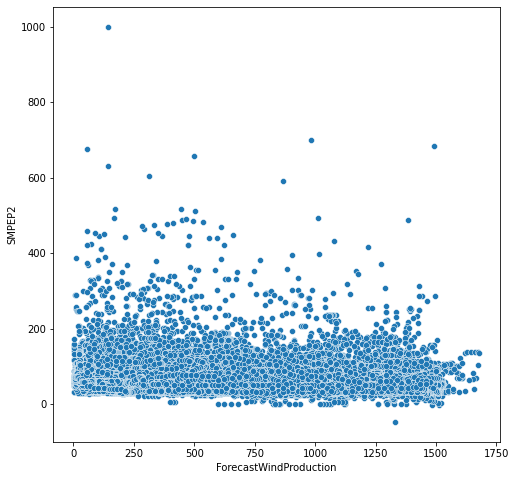

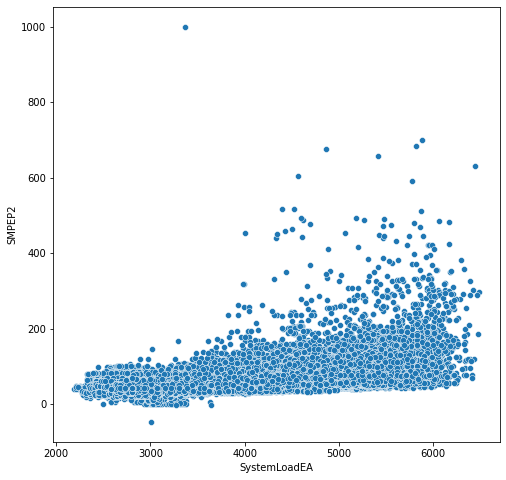

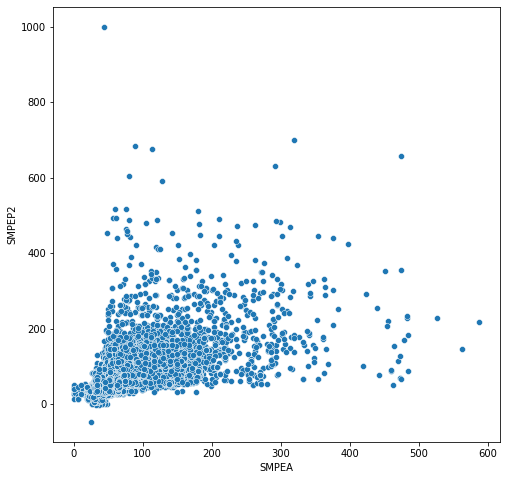

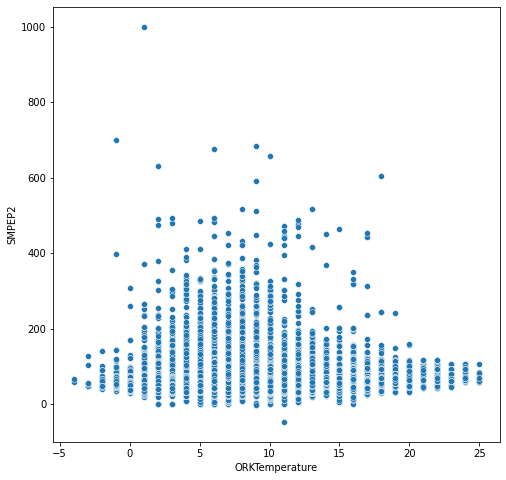

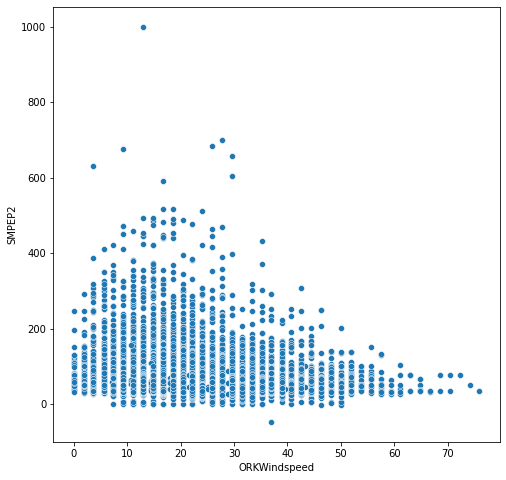

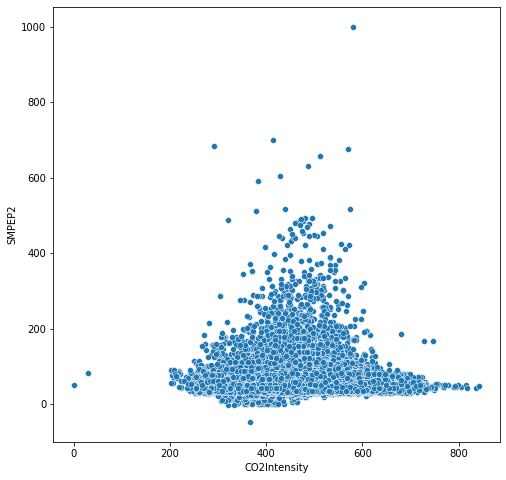

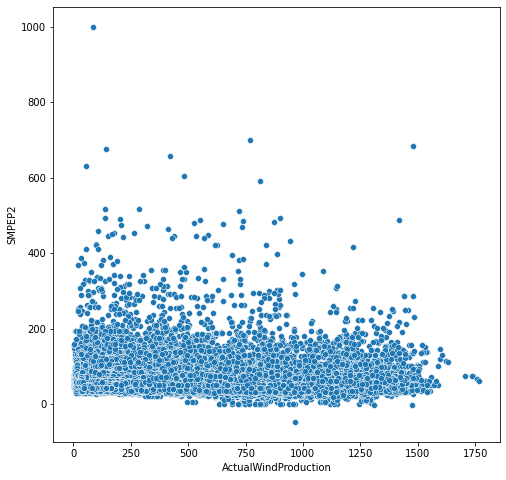

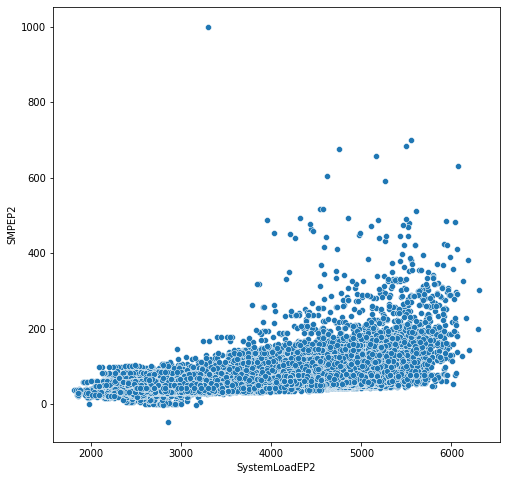

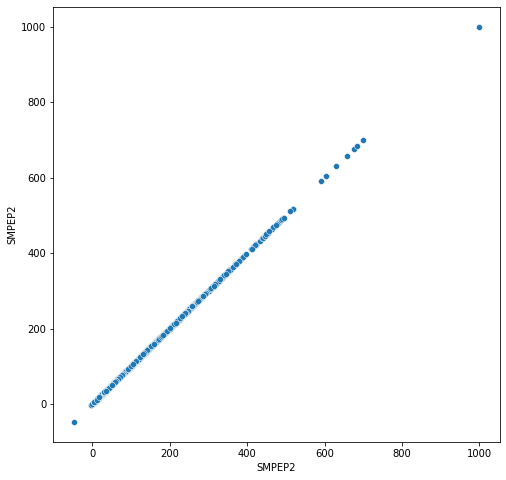

In [17]:
def visualization1():
  for i in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8,8))
    value = sns.scatterplot(df[i],df['SMPEP2'])
visualization1()

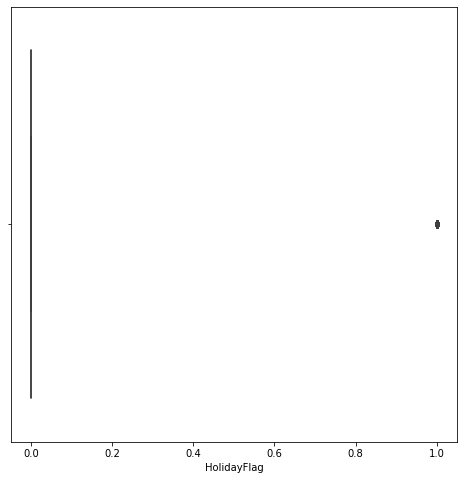

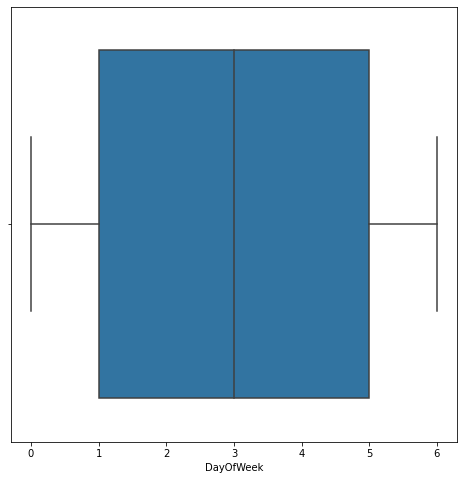

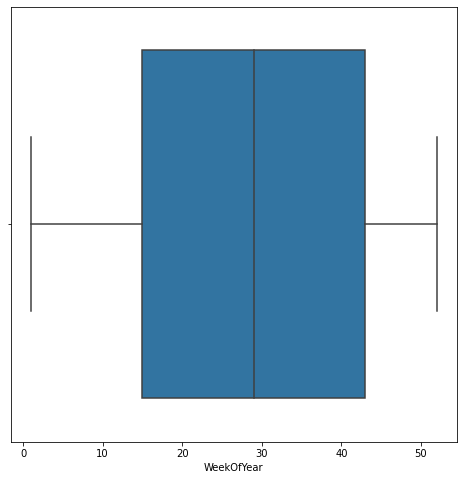

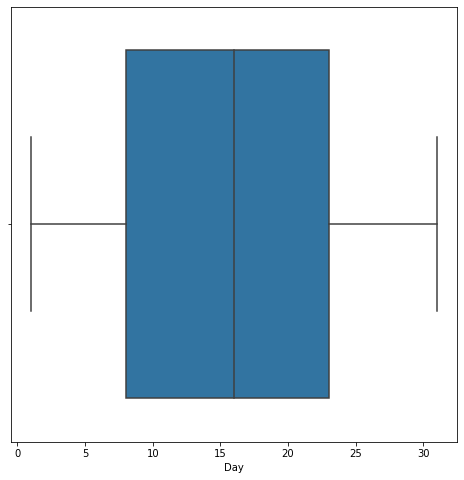

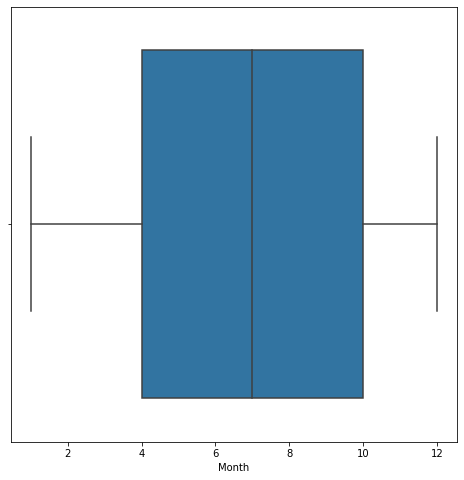

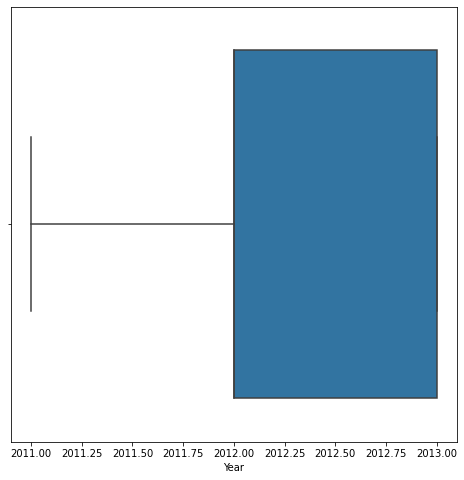

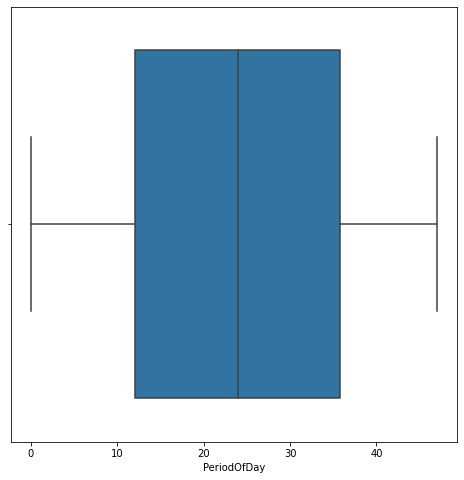

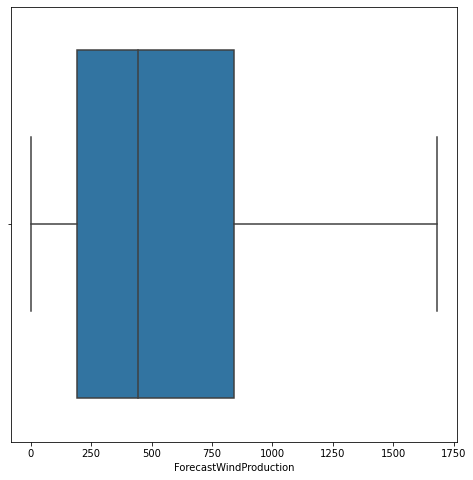

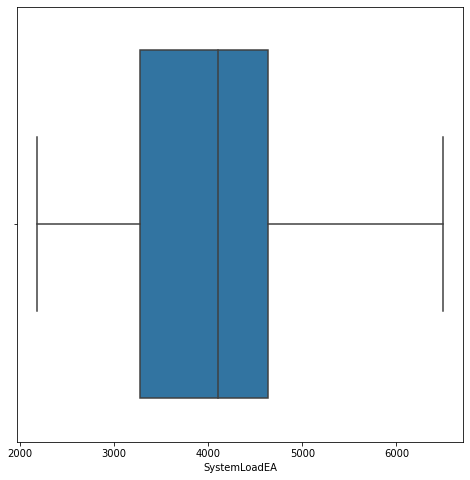

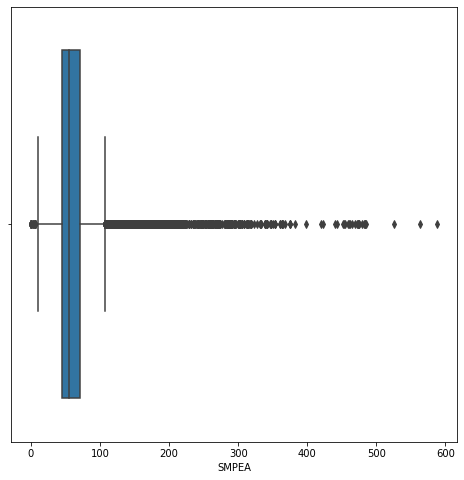

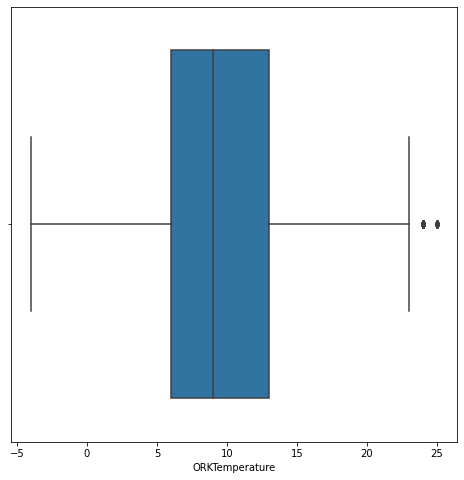

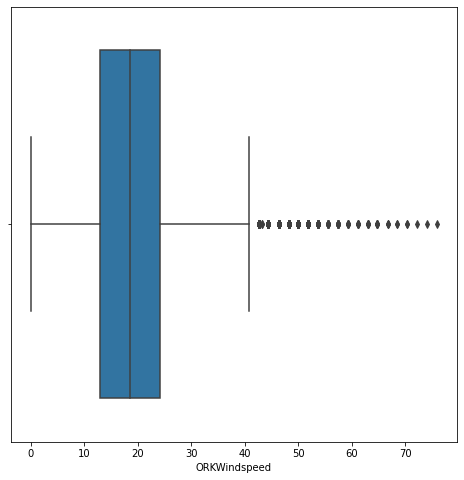

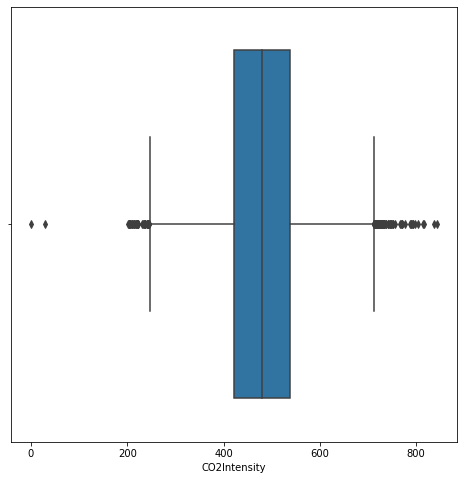

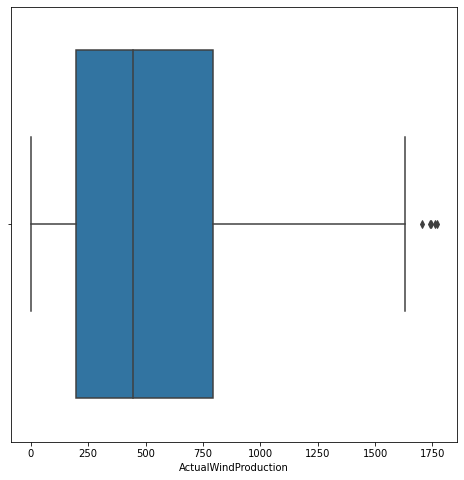

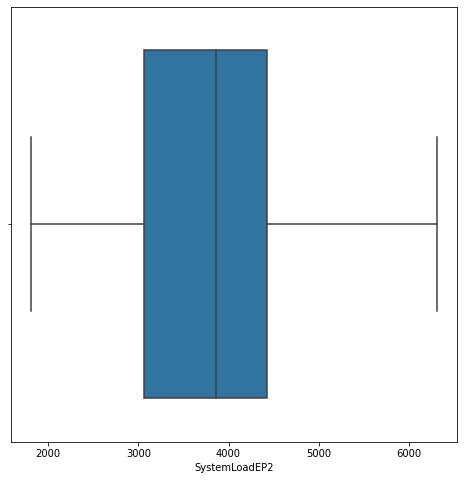

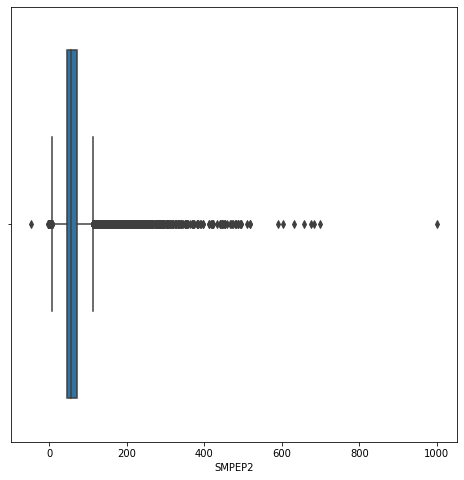

In [18]:
def visualization2():
  for i in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8,8))
    value = sns.boxplot(df[i])
visualization2()

In [19]:
corr_ = df.corr()
corr_

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
HolidayFlag,1.000000,-0.124773,-0.003286,0.046133,0.032414,-0.023431,-0.000016,0.086078,-0.056336,-0.000549,-0.097015,0.063268,-0.067414,0.073947,-0.084735,-0.005577
DayOfWeek,-0.124773,1.000000,0.007504,-0.004423,0.003056,-0.001196,0.000120,-0.034807,-0.185166,-0.077833,-0.015999,-0.054017,0.028015,-0.031222,-0.191667,-0.069745
WeekOfYear,-0.003286,0.007504,1.000000,0.060816,0.971182,-0.237323,-0.000083,0.049317,-0.027254,-0.018261,0.155915,-0.028200,-0.097288,0.065910,-0.041238,-0.016442
Day,0.046133,-0.004423,0.060816,1.000000,0.008698,-0.001786,0.000084,0.073624,-0.008627,-0.018567,0.014888,0.086866,-0.084517,0.062776,-0.028229,-0.013629
Month,0.032414,0.003056,0.971182,0.008698,1.000000,-0.236833,-0.000087,0.052114,-0.031995,-0.018040,0.150265,-0.028420,-0.107876,0.067856,-0.042769,-0.015551
Year,-0.023431,-0.001196,-0.237323,-0.001786,-0.236833,1.000000,-0.000049,-0.052236,-0.081155,0.045344,0.079380,-0.013207,-0.185930,-0.069241,-0.057210,0.046116
PeriodOfDay,-0.000016,0.000120,-0.000083,0.000084,-0.000087,-0.000049,1.000000,0.034641,0.608638,0.356302,0.138369,0.088360,-0.176696,0.061301,0.593974,0.323008
ForecastWindProduction,0.086078,-0.034807,0.049317,0.073624,0.052114,-0.052236,0.034641,1.000000,0.177009,-0.046271,-0.172943,0.714308,-0.653763,0.953510,0.032739,-0.080172
SystemLoadEA,-0.056336,-0.185166,-0.027254,-0.008627,-0.031995,-0.081155,0.608638,0.177009,1.000000,0.532754,-0.086573,0.182865,-0.208044,0.200469,0.972564,0.490802
SMPEA,-0.000549,-0.077833,-0.018261,-0.018567,-0.018040,0.045344,0.356302,-0.046271,0.532754,1.000000,0.019148,0.014335,-0.085590,-0.031920,0.535331,0.617151


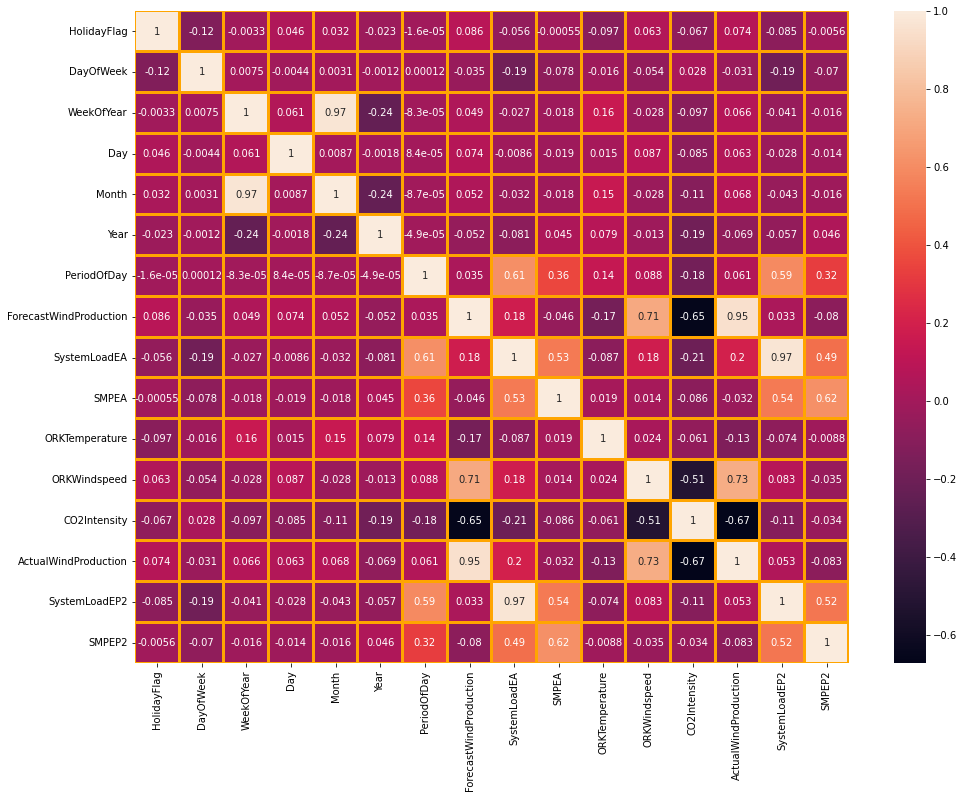

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,linewidths=2,linecolor='orange')

In [21]:
df = df.drop(['ForecastWindProduction','SystemLoadEA','HolidayFlag','DayOfWeek','WeekOfYear'],axis=1)

df.head()

,Day,Month,Year,PeriodOfDay,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,1,11,2011,0,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,1,11,2011,1,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,1,11,2011,2,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,1,11,2011,3,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,1,11,2011,4,33.75,6.0,11.1,571.52,346.0,2655.64,39.87


In [22]:
df = df.drop(['PeriodOfDay','Year'],axis=1)
df.head()

,Day,Month,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,1,11,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,1,11,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,1,11,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,1,11,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,1,11,33.75,6.0,11.1,571.52,346.0,2655.64,39.87


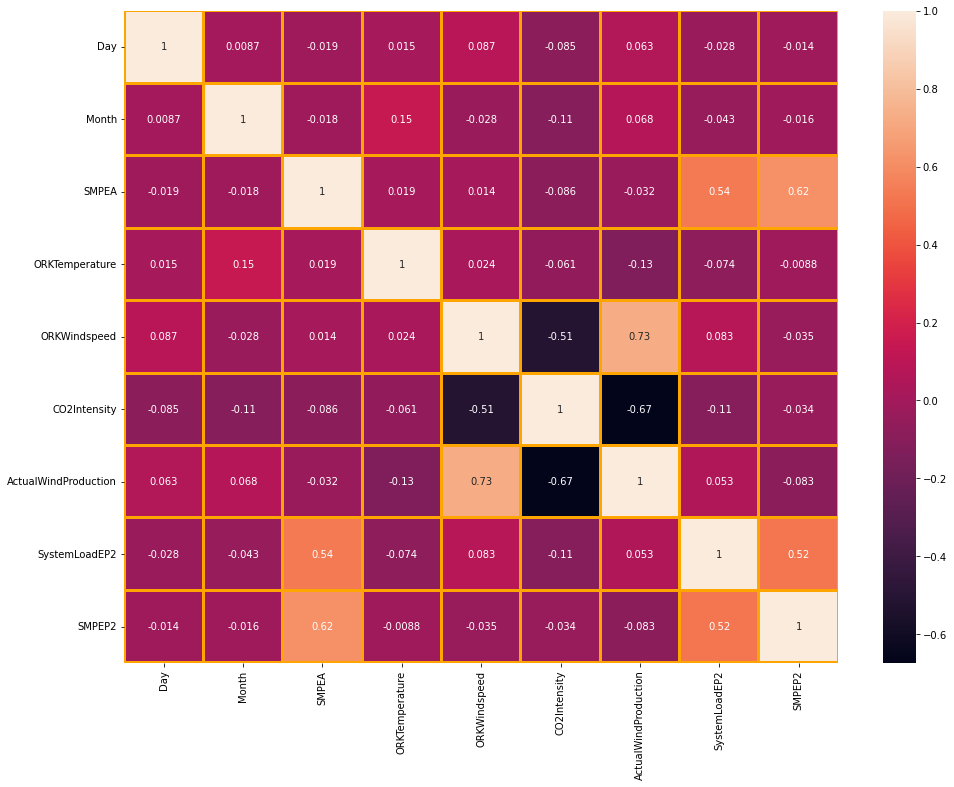

In [23]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,linewidths=2,linecolor='orange')

In [24]:
df.skew()

Day                     0.005854
Month                  -0.114857
SMPEA                   4.399085
ORKTemperature          0.185382
ORKWindspeed            0.769347
CO2Intensity            0.009931
ActualWindProduction    0.596575
SystemLoadEP2          -0.030069
SMPEP2                  5.036437
dtype: float64

In [28]:
X = df.drop(['SMPEP2'],axis=1)
Y = df['SMPEP2']

In [29]:
print(X.shape)
print(Y.shape)

(37682, 8)
(37682,)


In [30]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt

PowerTransformer()

In [31]:
X = pd.DataFrame(pt.fit_transform(X),columns=X.columns)
X

,Day,Month,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2
0,-1.892007,1.131593,-0.403612,-0.794997,-1.079123,1.419727,-0.208212,-0.739237
1,-1.892007,1.131593,-0.403612,-0.794997,-0.824109,1.474588,-0.329170,-0.964585
2,-1.892007,1.131593,-0.412121,-1.036063,-0.824109,1.294577,-0.348521,-1.133320
3,-1.892007,1.131593,-0.469242,-0.794997,-1.079123,1.247597,-0.342047,-1.264955
4,-1.892007,1.131593,-1.401414,-0.794997,-0.824109,1.079410,-0.238474,-1.350952
...,...,...,...,...,...,...,...,...
37677,1.592523,1.386874,-1.342191,-0.794997,0.426593,-2.293869,0.848237,-0.101642
37678,1.592523,1.386874,-1.395115,-1.036063,0.605290,-2.377451,0.922091,-0.246628
37679,1.592523,1.386874,-1.564148,-1.283917,0.249963,-2.346398,1.115482,-0.378648
37680,1.592523,1.386874,-1.395115,-1.036063,-0.357023,-2.089372,1.095022,-0.254976


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [33]:
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Day,Month,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2
0,-1.892007,1.131593,-0.403612,-0.794997,-1.079123,1.419727,-0.208212,-0.739237
1,-1.892007,1.131593,-0.403612,-0.794997,-0.824109,1.474588,-0.329170,-0.964585
2,-1.892007,1.131593,-0.412121,-1.036063,-0.824109,1.294577,-0.348521,-1.133320
3,-1.892007,1.131593,-0.469242,-0.794997,-1.079123,1.247597,-0.342047,-1.264955
4,-1.892007,1.131593,-1.401414,-0.794997,-0.824109,1.079410,-0.238474,-1.350952
...,...,...,...,...,...,...,...,...
37677,1.592523,1.386874,-1.342191,-0.794997,0.426593,-2.293869,0.848237,-0.101642
37678,1.592523,1.386874,-1.395115,-1.036063,0.605290,-2.377451,0.922091,-0.246628
37679,1.592523,1.386874,-1.564148,-1.283917,0.249963,-2.346398,1.115482,-0.378648
37680,1.592523,1.386874,-1.395115,-1.036063,-0.357023,-2.089372,1.095022,-0.254976


In [25]:
df.isnull().sum()

Day                       0
Month                     0
SMPEA                     2
ORKTemperature          295
ORKWindspeed            299
CO2Intensity              7
ActualWindProduction      5
SystemLoadEP2             2
SMPEP2                    2
dtype: int64

In [26]:
df = df.dropna()

In [27]:
df.isnull().sum()

Day                     0
Month                   0
SMPEA                   0
ORKTemperature          0
ORKWindspeed            0
CO2Intensity            0
ActualWindProduction    0
SystemLoadEP2           0
SMPEP2                  0
dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28261, 8)
(9421, 8)
(28261,)
(9421,)


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
print(y_lr)
lr.score(X_test,y_test)

[60.74406417 87.45026861 64.59962201 ... 68.91180302 51.14279078
 35.78730477]


0.4067318107917467

In [37]:
from sklearn.metrics import r2_score,classification_report,confusion_matrix,mean_absolute_error,mean_squared_error

In [38]:
mean_absolute_error(y_test,y_lr)

15.123886079400439

In [39]:
mean_squared_error(y_test,y_lr)


688.4089190745067

In [40]:
np.sqrt(mean_squared_error(y_test,y_lr))

26.237547886083156

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_dt = dt.predict(X_test)
print(y_dt)
print(dt.score(X_test,y_test))

[ 52.48 105.95  49.11 ...  69.64  47.03  44.01]
0.026350572302399566


In [43]:
print(mean_absolute_error(y_test,y_dt))
print(mean_squared_error(y_test,y_dt))
print(np.sqrt(mean_squared_error(y_test,y_dt)))

12.141616601210062
1129.7908134486786
33.612361021634264


In [46]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
y_svr = svr.predict(X_test)
print(y_svr)
print(svr.score(X_test,y_test))

[52.00143586 82.48747818 58.04680672 ... 54.28023195 44.393739
 39.89411648]
0.4165269189682974


In [47]:
print(mean_absolute_error(y_test,y_svr))
print(mean_squared_error(y_test,y_svr))
print(np.sqrt(mean_squared_error(y_test,y_svr)))

12.787940032982835
677.0429972963036
26.020049909565962


In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_rf = rf.predict(X_test)
print(y_rf)
print(rf.score(X_test,y_test))

[52.3409 79.3691 58.7095 ... 69.9429 47.35   48.0031]
0.5965368825183979


In [49]:
print(mean_absolute_error(y_test,y_rf))
print(mean_squared_error(y_test,y_rf))
print(np.sqrt(mean_squared_error(y_test,y_rf)))

9.523721738668932
468.16534856286285
21.637128935301533


In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_gbr = gbr.predict(X_test)
print(y_gbr)
print(gbr.score(X_test,y_test))

[51.3231468  82.72216953 62.4408938  ... 64.85391866 46.92787942
 44.74777218]
0.5009826960042543


In [51]:
print(mean_absolute_error(y_test,y_gbr))
print(mean_squared_error(y_test,y_gbr))
print(np.sqrt(mean_squared_error(y_test,y_gbr)))

13.229100749758123
579.0432878284632
24.06331830459929


In [54]:
from sklearn.ensemble import AdaBoostRegressor
adr = AdaBoostRegressor()
adr.fit(X_train,y_train)
y_adr = adr.predict(X_test)
print(y_adr)
print(adr.score(X_test,y_test))

[71.46132225 94.81848274 58.56964531 ... 71.46132225 53.97125788
 51.76536842]
0.14123752159120706


In [55]:
print(mean_absolute_error(y_test,y_adr))
print(mean_squared_error(y_test,y_adr))
print(np.sqrt(mean_squared_error(y_test,y_adr)))

19.69060038531107
996.4797713022522
31.56706782870801
